# メディア情報学実験 資料ノート2

## パターン識別編（その１）

解答がわからなかった人，解答の方針が立たない人向けのノートです．

1. 上から順に読んで（重要），
2. セルを実行していってください．
3. 理解できない場合は，TA を呼ぶか，先生に質問を投げるかしてください．
4. 自分の演習ノートのページにコードを真似して貼り付けしてください

In [22]:
import numpy as np
import matplotlib.pylab as plt

数直線上のデータを２クラスに分類する問題を考える
データは， 0.2 と 0.8 を中心とするガウス分布で生成する

* 0.2 を中心とするデータには ０ のラベル
* 0.8 を中心とするデータには 1 のラベル



In [23]:
# ここらへんのパラメータはいじってく遊んでください

N = 200     # 点の個数
m1 = 0.3    # クラス１の中心
m2 = 0.9    # クラス２の中心
sgm = 0.15 # ガウス分布の標準偏差

x1 = m1 + sgm * np.random.randn(N//2) # N(x1 | m1, sgm^2)
x2 = m2 + sgm * np.random.randn(N//2) # N(x2 | m2, sgm^2)
y1 = np.repeat(0, N//2)
y2 = np.repeat(1, N//2)

x = np.hstack((x1, x2))
y = np.hstack((y1, y2))

### これで下準備完了
(x, y) にデータが入っている．これのプロットと真の直線の関係を見てみる

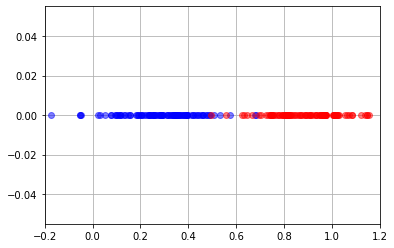

In [24]:
# 数直線上にデータをばらまくとかんな感じ
plt.plot( x[y == 0], np.repeat(0, np.sum(y==0)), 'bo', alpha=0.5) # y == 0 の点を描画
plt.plot( x[y == 1], np.repeat(0, np.sum(y==1)), 'ro', alpha=0.5) # y == 1 の点を描画
plt.xlim(-0.2, 1.2)
plt.grid()

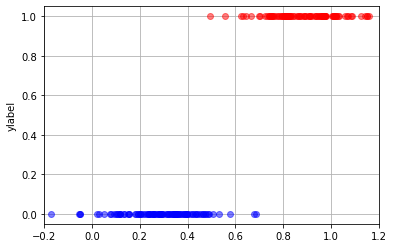

In [25]:
# ｙのラベルをそれぞれ 0 と　1 という値として図を書くとこんな感じになる
plt.plot(x[y==0], y[y==0], 'bo', alpha=0.5)
plt.plot(x[y==1], y[y==1], 'ro', alpha=0.5)
plt.ylabel('ylabel')
plt.xlim(-0.2, 1.2)
plt.grid()

上図を見る限り x=0.5 より小さい付近だと青で，それより大きくなると赤と判断してよさそう．
それでは，この赤と青のクラスの境界はどこに置くのがよさそうかを考えてみよう．というのがお題になります．

## 問い: 赤点と青点の境界をx軸上に定めて赤/青クラスを判別することは可能か？

図をみたらおおよそ，0.5 付近が境界なんだろというのは見たらわかります．（そういう風に問題を作っているので）
問題はこの値をアルゴリズムを介して得るにはどうしたらよいか？を問うています．

ということで，１次元のデータ上でクラス境界を求めます．
データの点群を $\{x_n\}$ とすると， 0 のラベルが付いたクラスと 1 のラベルのついたクラスが，上図のように張り付くので
ロジスティック関数を適当にパラメータを変えつつ貼り付けてフィッティングする．（ロジスティック回帰と呼ばれる）．

ロジスティック関数は下のような関数

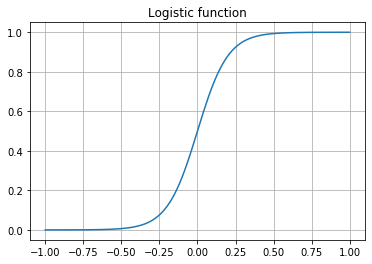

In [26]:
xx = np.linspace(-1, 1, 128)
beta = 10.0
yy = 1 / (1 + np.exp(-beta * xx))
plt.plot(xx, yy)
plt.title('Logistic function')
plt.grid()

ロジスティック関数を上述のデータにフィッティングさせて，クラス 0 か 1 の確信度をロジスティック関数値で記載しよう，というのが機械学習的な方法になる．
以下，面倒なので，標準ロジスティック関数を　$\sigma$ として表す．
$$
\sigma(u) = \frac{1}{1+\exp(-u)}
$$
ロジスティック回帰の場合は， 変数の線形和をロジスティック関数にかけることで
推定モデルをつくる．　この場合は $x$ は１変数なので， $f(x; w) = \sigma( w_1 x + w_0)$ とおいて， $w_0$ と $w_1$ を推定することを考える．

さらにロス関数もちょっと特殊になる．

* ラベル$y$ が 0 のときは， $f(x, w)$ も　０ に近い値であってほしい
* ラベル$y$ が 1 のときは， $f(x, w)$ は，1 に近い値であってほしい　→ $1 - f(x, w)$ が　０に近い値であってほしい

ということなので，　$\prod_n f(x_n, w)^{y_n} (1-f(x_n, w)）^{1-y_n}$ ができるだけ大きい値をとればよい．
ただ，このままだと微分とかの操作が厄介なので単調関数の $\log$ をとって，ロス関数の体裁に合わせるために負号をつけることで
$$
    J(w) = - \sum_n y_n \log f(x_n, w) + (1-y_n) \log (1-f(x_n, w))
$$
を使う．この関数は交差エントロピー関数と呼ばれる．
二乗誤差を使ってもよいが性能はでない，理由が知りたい人は質問してください．

あとは線形回帰のときと同じく

## モデル $f(x_n; w)$ のロスが小さくなるように $w$ を求める．

## Scikit-Learn を用いた場合

この場合は単なる回帰ではなくロジスティック回帰をしないといけないのだけど，これも Scikit-Learn には用意されているので，それをインポートしてくればよい．
`LogisticRegression` モデルは，2クラス分類で用いられるクラスで，クラスの確率値を吐き出してくれるので，これを識別機(Classifier）として用いる．学習時になることは `fit` すること．

In [27]:
# ロジスティック回帰モデルをインポート
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

# モデルを構築
clsf = LogisticRegression()

# データにフィット
clsf.fit(x.reshape(N, 1), y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

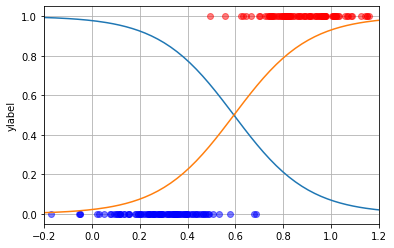

In [28]:
# ｙのラベルをそれぞれ 0 と　1 という値として図を書くとこんな感じになる
plt.plot(x[y==0], y[y==0], 'bo', alpha=0.5)
plt.plot(x[y==1], y[y==1], 'ro', alpha=0.5)
plt.ylabel('ylabel')
plt.xlim(-0.2, 1.2)
plt.grid()

# それじゃ，x = [-0.3, 1.4] の区間の値を予測してラベルを張り付けてみよう
xx = np.linspace(-0.3, 1.4, 128)
yy = clsf.predict_proba(xx.reshape(128,1))

plt.plot(xx, yy) #青線が青クラスの確率値，オレンジ線は赤クラスの確率値

## Keras + TensorFlow を用いた解法

前述の通り，普通は，こんな単純な識別問題には *使いません* ．
違うところは，ロジスティック関数をかけるために *活性化関数* というものを使います．
活性化関数は計算した線形和に変調をかけるための関数です．
ロジスティック関数は, 活性化関数として 'sigmoid' と呼ばれるタイプのものを選べばOK（のはず）です．

ロスに関しては 'binary_crossentropy' を選べばOKです．

結構時間かかります．

収束に時間かかるので，純粋な 'sgd' (確率降下法）ではなく 'adam' と呼ばれる最適化メソッド使います

あとで表示するロスの値が収束していなさそうであれば， epochs パラメータ増やして再度実験してください．

In [29]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()   # 階層型のモデルを選択
model.add(Dense(1, input_shape=(1,), use_bias=True))
model.add(Activation('sigmoid')) # ロジスティック回帰の時は出力層がsigmoid になるのでこれを追加

model.compile(loss='binary_crossentropy',  optimizer='adam') #最適化手法を指定．sgd から adam に変更

In [34]:
# 学習によるパラメータフィット
# 何回かこのセルを実行するか，Epoch 回数を増やすことでフィッティングの精度を上げることは可能
# (時間かかるけど)
hist = model.fit(x, y, epochs=4096, batch_size=100, verbose=1)

#hist = model.fit(x, y, epochs=8192, batch_size=100, verbose=0)

Train on 200 samples
Epoch 1/4096
200/200 [==============================] - 0s 186us/sample - loss: 0.5491
Epoch 2/4096
200/200 [==============================] - 0s 28us/sample - loss: 0.5489
Epoch 3/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.5487
Epoch 4/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.5484
Epoch 5/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.5482
Epoch 6/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.5480
Epoch 7/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.5478
Epoch 8/4096
200/200 [==============================] - 0s 26us/sample - loss: 0.5476
Epoch 9/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.5474
Epoch 10/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.5472
Epoch 11/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.5470
Epoch 12/4096
200/200 [=======

200/200 [==============================] - 0s 23us/sample - loss: 0.5300
Epoch 96/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.5298
Epoch 97/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.5296
Epoch 98/4096
200/200 [==============================] - 0s 36us/sample - loss: 0.5294
Epoch 99/4096
200/200 [==============================] - 0s 32us/sample - loss: 0.5293
Epoch 100/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.5291
Epoch 101/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.5289
Epoch 102/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.5287
Epoch 103/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.5285
Epoch 104/4096
200/200 [==============================] - 0s 29us/sample - loss: 0.5283
Epoch 105/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.5281
Epoch 106/4096
200/200 [===========================

200/200 [==============================] - 0s 29us/sample - loss: 0.4946
Epoch 282/4096
200/200 [==============================] - 0s 26us/sample - loss: 0.4944
Epoch 283/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.4943
Epoch 284/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.4941
Epoch 285/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.4939
Epoch 286/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.4937
Epoch 287/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.4935
Epoch 288/4096
200/200 [==============================] - 0s 28us/sample - loss: 0.4933
Epoch 289/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.4932
Epoch 290/4096
200/200 [==============================] - 0s 28us/sample - loss: 0.4930
Epoch 291/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.4928
Epoch 292/4096
200/200 [=======================

200/200 [==============================] - 0s 22us/sample - loss: 0.4621
Epoch 468/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.4619
Epoch 469/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.4617
Epoch 470/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.4616
Epoch 471/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.4614
Epoch 472/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.4612
Epoch 473/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.4611
Epoch 474/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.4609
Epoch 475/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.4607
Epoch 476/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.4606
Epoch 477/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.4604
Epoch 478/4096
200/200 [=======================

200/200 [==============================] - 0s 29us/sample - loss: 0.4321
Epoch 654/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.4320
Epoch 655/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.4318
Epoch 656/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.4317
Epoch 657/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.4315
Epoch 658/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.4314
Epoch 659/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.4312
Epoch 660/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.4311
Epoch 661/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.4309
Epoch 662/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.4308
Epoch 663/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.4306
Epoch 664/4096
200/200 [=======================

200/200 [==============================] - 0s 28us/sample - loss: 0.4047
Epoch 840/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.4045
Epoch 841/4096
200/200 [==============================] - 0s 28us/sample - loss: 0.4044
Epoch 842/4096
200/200 [==============================] - 0s 28us/sample - loss: 0.4042
Epoch 843/4096
200/200 [==============================] - 0s 28us/sample - loss: 0.4041
Epoch 844/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.4040
Epoch 845/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.4038
Epoch 846/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.4037
Epoch 847/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.4035
Epoch 848/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.4034
Epoch 849/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.4033
Epoch 850/4096
200/200 [=======================

Epoch 1025/4096
200/200 [==============================] - 0s 28us/sample - loss: 0.3794
Epoch 1026/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.3792
Epoch 1027/4096
200/200 [==============================] - 0s 28us/sample - loss: 0.3791
Epoch 1028/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.3790
Epoch 1029/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.3789
Epoch 1030/4096
200/200 [==============================] - 0s 33us/sample - loss: 0.3787
Epoch 1031/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.3786
Epoch 1032/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.3785
Epoch 1033/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.3783
Epoch 1034/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.3782
Epoch 1035/4096
200/200 [==============================] - 0s 33us/sample - loss: 0.3781
Epoch 1036/4096
200/2

200/200 [==============================] - 0s 30us/sample - loss: 0.3676
Epoch 1118/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.3675
Epoch 1119/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.3674
Epoch 1120/4096
200/200 [==============================] - 0s 39us/sample - loss: 0.3672
Epoch 1121/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.3671
Epoch 1122/4096
200/200 [==============================] - 0s 76us/sample - loss: 0.3670
Epoch 1123/4096
200/200 [==============================] - 0s 44us/sample - loss: 0.3669
Epoch 1124/4096
200/200 [==============================] - 0s 62us/sample - loss: 0.3668
Epoch 1125/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.3666
Epoch 1126/4096
200/200 [==============================] - 0s 92us/sample - loss: 0.3665
Epoch 1127/4096
200/200 [==============================] - 0s 37us/sample - loss: 0.3664
Epoch 1128/4096
200/200 [============

200/200 [==============================] - 0s 25us/sample - loss: 0.3455
Epoch 1302/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.3454
Epoch 1303/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.3453
Epoch 1304/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.3452
Epoch 1305/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.3451
Epoch 1306/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.3449
Epoch 1307/4096
200/200 [==============================] - 0s 29us/sample - loss: 0.3448
Epoch 1308/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.3447
Epoch 1309/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.3446
Epoch 1310/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.3445
Epoch 1311/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.3444
Epoch 1312/4096
200/200 [============

200/200 [==============================] - 0s 25us/sample - loss: 0.3251
Epoch 1486/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.3250
Epoch 1487/4096
200/200 [==============================] - 0s 19us/sample - loss: 0.3249
Epoch 1488/4096
200/200 [==============================] - 0s 19us/sample - loss: 0.3248
Epoch 1489/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.3247
Epoch 1490/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.3246
Epoch 1491/4096
200/200 [==============================] - 0s 19us/sample - loss: 0.3245
Epoch 1492/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.3244
Epoch 1493/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.3243
Epoch 1494/4096
200/200 [==============================] - 0s 29us/sample - loss: 0.3242
Epoch 1495/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.3241
Epoch 1496/4096
200/200 [============

200/200 [==============================] - 0s 25us/sample - loss: 0.3063
Epoch 1670/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.3062
Epoch 1671/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.3061
Epoch 1672/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.3061
Epoch 1673/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.3060
Epoch 1674/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.3059
Epoch 1675/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.3058
Epoch 1676/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.3057
Epoch 1677/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.3056
Epoch 1678/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.3055
Epoch 1679/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.3054
Epoch 1680/4096
200/200 [============

200/200 [==============================] - 0s 22us/sample - loss: 0.2890
Epoch 1854/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.2889
Epoch 1855/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.2888
Epoch 1856/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.2887
Epoch 1857/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.2886
Epoch 1858/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.2885
Epoch 1859/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.2884
Epoch 1860/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.2883
Epoch 1861/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.2882
Epoch 1862/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.2881
Epoch 1863/4096
200/200 [==============================] - 0s 19us/sample - loss: 0.2881
Epoch 1864/4096
200/200 [============

200/200 [==============================] - 0s 22us/sample - loss: 0.2729
Epoch 2038/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.2728
Epoch 2039/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.2727
Epoch 2040/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.2726
Epoch 2041/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.2726
Epoch 2042/4096
200/200 [==============================] - 0s 26us/sample - loss: 0.2725
Epoch 2043/4096
200/200 [==============================] - 0s 19us/sample - loss: 0.2724
Epoch 2044/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.2723
Epoch 2045/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.2722
Epoch 2046/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.2721
Epoch 2047/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.2720
Epoch 2048/4096
200/200 [============

200/200 [==============================] - 0s 24us/sample - loss: 0.2580
Epoch 2222/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.2579
Epoch 2223/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.2578
Epoch 2224/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.2578
Epoch 2225/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.2577
Epoch 2226/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.2576
Epoch 2227/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.2575
Epoch 2228/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.2575
Epoch 2229/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.2574
Epoch 2230/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.2573
Epoch 2231/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.2572
Epoch 2232/4096
200/200 [============

200/200 [==============================] - 0s 23us/sample - loss: 0.2442
Epoch 2406/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.2441
Epoch 2407/4096
200/200 [==============================] - 0s 33us/sample - loss: 0.2441
Epoch 2408/4096
200/200 [==============================] - 0s 33us/sample - loss: 0.2440
Epoch 2409/4096
200/200 [==============================] - 0s 33us/sample - loss: 0.2439
Epoch 2410/4096
200/200 [==============================] - 0s 28us/sample - loss: 0.2438
Epoch 2411/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.2438
Epoch 2412/4096
200/200 [==============================] - 0s 29us/sample - loss: 0.2437
Epoch 2413/4096
200/200 [==============================] - 0s 36us/sample - loss: 0.2436
Epoch 2414/4096
200/200 [==============================] - 0s 34us/sample - loss: 0.2436
Epoch 2415/4096
200/200 [==============================] - 0s 26us/sample - loss: 0.2435
Epoch 2416/4096
200/200 [============

200/200 [==============================] - 0s 23us/sample - loss: 0.2314
Epoch 2590/4096
200/200 [==============================] - 0s 36us/sample - loss: 0.2314
Epoch 2591/4096
200/200 [==============================] - 0s 53us/sample - loss: 0.2313
Epoch 2592/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.2312
Epoch 2593/4096
200/200 [==============================] - 0s 42us/sample - loss: 0.2312
Epoch 2594/4096
200/200 [==============================] - 0s 29us/sample - loss: 0.2311
Epoch 2595/4096
200/200 [==============================] - 0s 35us/sample - loss: 0.2310
Epoch 2596/4096
200/200 [==============================] - 0s 47us/sample - loss: 0.2310
Epoch 2597/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.2309
Epoch 2598/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.2308
Epoch 2599/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.2308
Epoch 2600/4096
200/200 [============

200/200 [==============================] - 0s 20us/sample - loss: 0.2196
Epoch 2774/4096
200/200 [==============================] - 0s 57us/sample - loss: 0.2195
Epoch 2775/4096
200/200 [==============================] - 0s 50us/sample - loss: 0.2195
Epoch 2776/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.2194
Epoch 2777/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.2194
Epoch 2778/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.2193
Epoch 2779/4096
200/200 [==============================] - 0s 33us/sample - loss: 0.2192
Epoch 2780/4096
200/200 [==============================] - 0s 39us/sample - loss: 0.2192
Epoch 2781/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.2191
Epoch 2782/4096
200/200 [==============================] - 0s 45us/sample - loss: 0.2190
Epoch 2783/4096
200/200 [==============================] - 0s 32us/sample - loss: 0.2190
Epoch 2784/4096
200/200 [============

200/200 [==============================] - 0s 22us/sample - loss: 0.2086
Epoch 2958/4096
200/200 [==============================] - 0s 33us/sample - loss: 0.2085
Epoch 2959/4096
200/200 [==============================] - 0s 29us/sample - loss: 0.2085
Epoch 2960/4096
200/200 [==============================] - 0s 33us/sample - loss: 0.2084
Epoch 2961/4096
200/200 [==============================] - 0s 90us/sample - loss: 0.2084
Epoch 2962/4096
200/200 [==============================] - 0s 34us/sample - loss: 0.2083
Epoch 2963/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.2082
Epoch 2964/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.2082
Epoch 2965/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.2081
Epoch 2966/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.2081
Epoch 2967/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.2080
Epoch 2968/4096
200/200 [============

200/200 [==============================] - 0s 31us/sample - loss: 0.1983
Epoch 3142/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.1983
Epoch 3143/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.1982
Epoch 3144/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.1982
Epoch 3145/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.1981
Epoch 3146/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.1981
Epoch 3147/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.1980
Epoch 3148/4096
200/200 [==============================] - 0s 19us/sample - loss: 0.1980
Epoch 3149/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.1979
Epoch 3150/4096
200/200 [==============================] - 0s 26us/sample - loss: 0.1979
Epoch 3151/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.1978
Epoch 3152/4096
200/200 [============

200/200 [==============================] - 0s 21us/sample - loss: 0.1888
Epoch 3326/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.1888
Epoch 3327/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.1887
Epoch 3328/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.1887
Epoch 3329/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.1886
Epoch 3330/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.1886
Epoch 3331/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.1885
Epoch 3332/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.1885
Epoch 3333/4096
200/200 [==============================] - 0s 51us/sample - loss: 0.1884
Epoch 3334/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.1884
Epoch 3335/4096
200/200 [==============================] - 0s 21us/sample - loss: 0.1883
Epoch 3336/4096
200/200 [============

200/200 [==============================] - 0s 20us/sample - loss: 0.1800
Epoch 3510/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.1799
Epoch 3511/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.1799
Epoch 3512/4096
200/200 [==============================] - 0s 23us/sample - loss: 0.1798
Epoch 3513/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.1798
Epoch 3514/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.1797
Epoch 3515/4096
200/200 [==============================] - 0s 26us/sample - loss: 0.1797
Epoch 3516/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.1796
Epoch 3517/4096
200/200 [==============================] - 0s 20us/sample - loss: 0.1796
Epoch 3518/4096
200/200 [==============================] - 0s 24us/sample - loss: 0.1795
Epoch 3519/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.1795
Epoch 3520/4096
200/200 [============

200/200 [==============================] - 0s 42us/sample - loss: 0.1717
Epoch 3694/4096
200/200 [==============================] - 0s 32us/sample - loss: 0.1717
Epoch 3695/4096
200/200 [==============================] - 0s 43us/sample - loss: 0.1716
Epoch 3696/4096
200/200 [==============================] - 0s 32us/sample - loss: 0.1716
Epoch 3697/4096
200/200 [==============================] - 0s 33us/sample - loss: 0.1715
Epoch 3698/4096
200/200 [==============================] - 0s 39us/sample - loss: 0.1715
Epoch 3699/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.1715
Epoch 3700/4096
200/200 [==============================] - 0s 63us/sample - loss: 0.1714
Epoch 3701/4096
200/200 [==============================] - 0s 38us/sample - loss: 0.1714
Epoch 3702/4096
200/200 [==============================] - 0s 40us/sample - loss: 0.1713
Epoch 3703/4096
200/200 [==============================] - 0s 50us/sample - loss: 0.1713
Epoch 3704/4096
200/200 [============

200/200 [==============================] - 0s 31us/sample - loss: 0.1641
Epoch 3878/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.1640
Epoch 3879/4096
200/200 [==============================] - 0s 34us/sample - loss: 0.1640
Epoch 3880/4096
200/200 [==============================] - 0s 38us/sample - loss: 0.1639
Epoch 3881/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.1639
Epoch 3882/4096
200/200 [==============================] - 0s 33us/sample - loss: 0.1638
Epoch 3883/4096
200/200 [==============================] - 0s 36us/sample - loss: 0.1638
Epoch 3884/4096
200/200 [==============================] - 0s 26us/sample - loss: 0.1638
Epoch 3885/4096
200/200 [==============================] - 0s 45us/sample - loss: 0.1637
Epoch 3886/4096
200/200 [==============================] - 0s 31us/sample - loss: 0.1637
Epoch 3887/4096
200/200 [==============================] - 0s 26us/sample - loss: 0.1636
Epoch 3888/4096
200/200 [============

200/200 [==============================] - 0s 24us/sample - loss: 0.1569
Epoch 4062/4096
200/200 [==============================] - 0s 22us/sample - loss: 0.1569
Epoch 4063/4096
200/200 [==============================] - 0s 27us/sample - loss: 0.1569
Epoch 4064/4096
200/200 [==============================] - 0s 40us/sample - loss: 0.1568
Epoch 4065/4096
200/200 [==============================] - 0s 26us/sample - loss: 0.1568
Epoch 4066/4096
200/200 [==============================] - 0s 25us/sample - loss: 0.1567
Epoch 4067/4096
200/200 [==============================] - 0s 39us/sample - loss: 0.1567
Epoch 4068/4096
200/200 [==============================] - 0s 38us/sample - loss: 0.1567
Epoch 4069/4096
200/200 [==============================] - 0s 44us/sample - loss: 0.1566
Epoch 4070/4096
200/200 [==============================] - 0s 30us/sample - loss: 0.1566
Epoch 4071/4096
200/200 [==============================] - 0s 35us/sample - loss: 0.1566
Epoch 4072/4096
200/200 [============

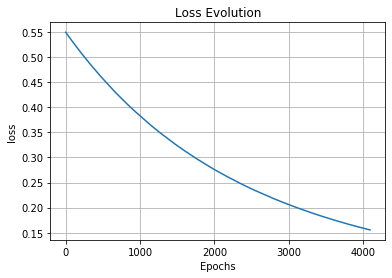

In [36]:
# ロスの値が学習によってどう変わるかを表示

plt.plot(hist.history['loss'])
#plt.semilogy(hist.history['loss']) #対数表示の方が騰落率の機微が読み取れる
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid()


かなり頑張ってる．（収束しているかは微妙かも）

演習なので，ここらで打ち切って，とりあえず，パラメータを取り出して確認してみる

In [37]:
# 結合とバイアスを取り出す．

weights, biases = model.get_weights()

# 最初の素子のパラメータを w0, w1 とする

w1 = float(weights[0])
w0 = float(biases[0])

print("w0, w1 = (%.3f, %.3f)" % (w0, w1))

w0, w1 = (-4.313, 7.379)


推定直線とデータ，真の直線を重ねて見る

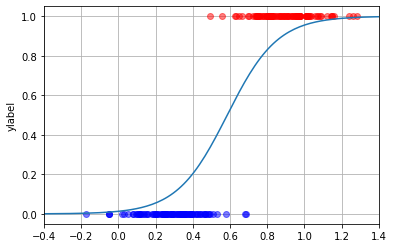

In [38]:
# ｙのラベルを値として図を書くとこんな感じになる
plt.plot(x[y==0], y[y==0], 'bo', alpha=0.5)
plt.plot(x[y==1], y[y==1], 'ro', alpha=0.5)
plt.ylabel('ylabel')
plt.grid()
plt.xlim(-0.4, 1.4)

xx = np.linspace(-0.4, 1.4, 128)
yy = 1/ (1+ np.exp(- (w1 *xx + w0)))
plt.plot(xx, yy)

うん，大体あってそう.

* y軸の値が０に近ければ，クラス０，
* y軸の値が1 に近ければ，クラス１

に分類すれば良さそうなので，　x = 0.6 付近が境界になる．
これは作成データから眺めると，まぁ，ただしそう